https://www.alvinang.sg/s/iris_dataset.csv

#Step 1: Import Dataset

In [1]:
import numpy as np
import pandas as pd
#from sklearn.preprocessing import LabelEncoder

# Read the Iris dataset into a Pandas DataFrame.
iris_df = pd.read_csv("https://www.alvinang.sg/s/iris_dataset.csv")

# Create a LabelEncoder object.
#le = LabelEncoder()

# Target
y = iris_df["species"]

# Features
X = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]



---



#Step 2: Use Random Forest Classifier (RFC) to Train the Dataset

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object.
rfc = RandomForestClassifier(n_estimators=3, criterion="entropy")

# Fit the model to the training data.
rfc.fit(X, y)

RandomForestClassifier(criterion='entropy', n_estimators=3)



---



#Step 4: Use RFC to Obtain the Feature Importances

In [3]:
# Get the feature importances.
feature_importances_rfc = rfc.feature_importances_.flatten()

# Create a Pandas DataFrame.
feature_importances_df_rfc = pd.DataFrame(
    data={
        "feature": X.columns,
        "importance": feature_importances_rfc,
    }
)

# Sort the DataFrame by the importance values.
feature_importances_df_rfc = feature_importances_df_rfc.sort_values(by="importance", ascending=False)

# Print the DataFrame.
display(feature_importances_df_rfc)

,feature,importance
3,petal_width,0.689601
2,petal_length,0.249357
0,sepal_length,0.049154
1,sepal_width,0.011888




---



##Step 5: Plotting the Feature Importances

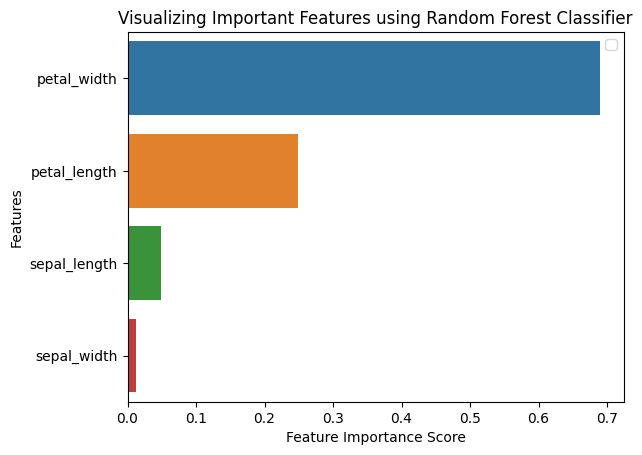

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Creating a bar plot
sns.barplot(x = feature_importances_df_rfc.importance, y = feature_importances_df_rfc.feature)

#Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features using Random Forest Classifier')
plt.legend()
plt.show()



---



#Step 6: Plotting the Trees in the Random Forest

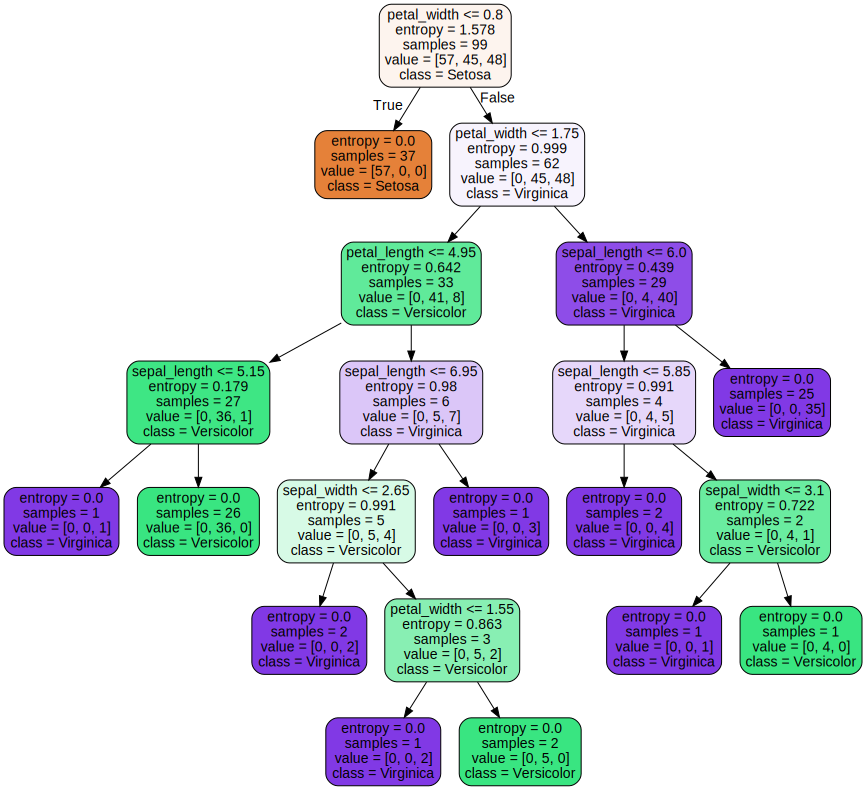

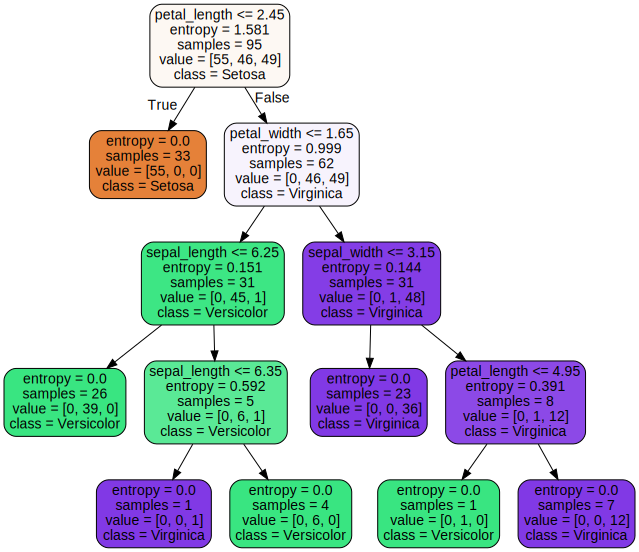

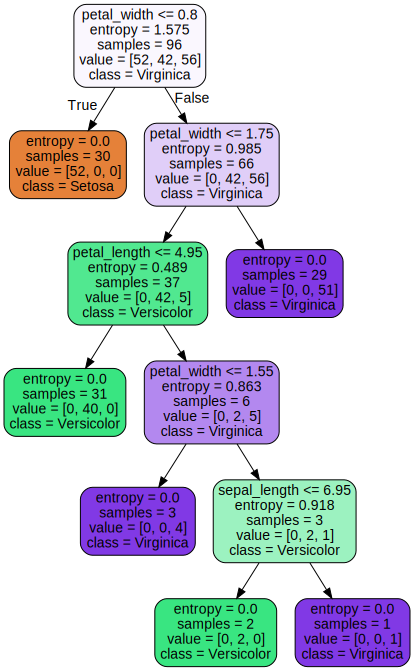

In [5]:
import graphviz
from sklearn.tree import export_graphviz

# Extract individual decision trees from the Random Forest
estimators = rfc.estimators_

# Visualize each tree using Graphviz
for i in range(len(estimators)):
    dot_data = export_graphviz(estimators[i], out_file=None, feature_names=list(X.columns),
                               class_names=["Setosa", "Versicolor", "Virginica"], filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    display(graph)  # This will print the trees in your console


- a random forest classifier does not pick the best tree.
Instead, it uses the predictions of all 3 trees to make a final prediction.
- This is done by taking the majority vote of the trees.
- For example, if 2 of the trees predict that the data point belongs to class 0 and 1 tree predicts that the data point belongs to class 1, then the random forest classifier will predict that the data point belongs to class 0.

- The random forest classifier works by building a set of decision trees.
- Each decision tree is built on a random subset of the data and a random subset of the features.
- This means that each tree is trained on a different part of the data and learns different patterns.

- When the random forest classifier makes a prediction, it takes the predictions of all the trees into account.
- This helps to reduce the variance of the model and makes it more robust to overfitting.



---

#THE END



---

